## Test on BRCA data

In [1]:
# Required to correctly display interactive (dynamic) plots in Jupyter notebooks
%matplotlib notebook
# For Jupyter Lab instead
# %matplotlib ipympl
import seaborn as sns

Set the main folder

In [2]:
import os
import pandas as pd
import numpy as np
print(os.getcwd())

C:\Users\lucacat\JupyterProjects\fdd_brca_pilot


### Data preparation

Load gene expression of breast cancer samples from the cohort 

In [96]:
data = pd.read_csv('sw_breast_gdat_2.csv')
if 'Unnamed: 0' in data.columns:
    print(data['Unnamed: 0'])
data = data.drop('Unnamed: 0', axis=1, errors='ignore')

0              F1
1              F2
2              F3
3              F4
4              F5
          ...    
3064    F2912repl
3065    F2958repl
3066    F3057repl
3067    F3085repl
3068    F3135repl
Name: Unnamed: 0, Length: 3069, dtype: object


In [4]:
print(data.shape)

(3069, 30866)


In [5]:
data.iloc[:,0:10].head()

,5_8S_rRNA,5S_rRNA,6M1-18,7M1-2,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1
0,-3.321928,4.911099,-3.321928,-3.321928,-0.539253,0.598115,-1.352525,-3.213583,6.172477,-1.584899
1,-3.321928,-3.321928,-3.321928,-3.321928,-0.576620,2.363673,-0.779430,-3.054421,7.113514,-2.329463
2,-3.321928,-3.321928,-3.321928,-3.321928,-1.651323,2.647738,0.085410,-3.321928,5.641996,-2.221576
3,-3.321928,3.656393,-3.321928,-3.321928,0.126633,1.378576,-0.334324,-3.321928,7.236769,-1.412293
4,-3.321928,4.190104,-3.321928,-3.321928,0.783715,2.759643,0.984849,-3.321928,7.508171,-0.135133


<IPython.core.display.Javascript object>


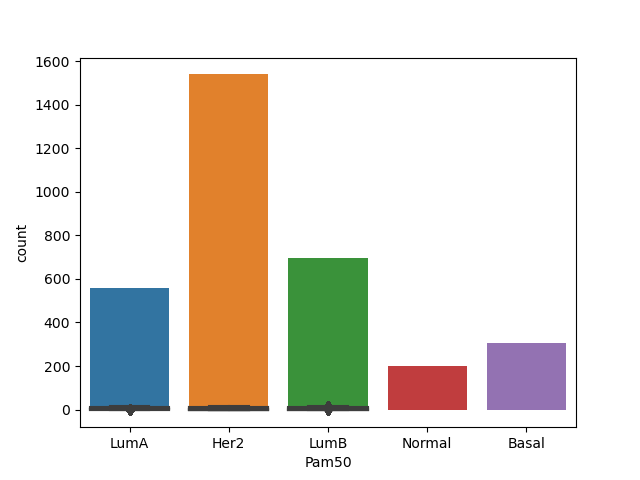

<AxesSubplot:>

In [6]:
X = data.loc[:,["ESR1","PGR","ERBB2"]]
sns.boxplot(data = X)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
sns.boxplot(data = scaledX)

<AxesSubplot:>

Read pheno

In [8]:
pheno = pd.read_csv('sw_breast_pheno.csv')
if 'Unnamed: 0' in pheno.columns:
    print(pheno['Unnamed: 0'])
pheno = pheno.drop('Unnamed: 0', axis=1, errors='ignore')

0              F1
1              F2
2              F3
3              F4
4              F5
          ...    
3064    F2912repl
3065    F2958repl
3066    F3057repl
3067    F3085repl
3068    F3135repl
Name: Unnamed: 0, Length: 3069, dtype: object

In [9]:
print(pheno.shape)
pheno.head()

(3069, 33)


,Sample_geo_accession,Sample_status,Sample_submission_date,Sample_last_update_date,Sample_type,Sample_channel_count,Sample_source_name_ch1,Sample_organism_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1.1,...,Sample_characteristics_ch1.8,Sample_characteristics_ch1.9,Sample_characteristics_ch1.10,Sample_characteristics_ch1.11,Sample_characteristics_ch1.12,Pam50,SurvDays,OverallSurv,Endocrine_treat,chemo
0,GSM2528079,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008818.C008840.S000215.l.r.m2.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G3,er prediction sgc: 0,pgr prediction sgc: 0,her2 prediction sgc: 0,ki67 prediction sgc: 1,Basal,2367,0,0.0,1.0
1,GSM2528080,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008769.C008792.S000250.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G2,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 0,ki67 prediction sgc: 0,LumA,2367,0,1.0,1.0
2,GSM2528081,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008568.C008577.S000424.l.r.m3.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G3,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 0,ki67 prediction sgc: 1,LumB,2168,1,1.0,1.0
3,GSM2528082,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008909.C009000.S000084.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G3,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 1,ki67 prediction sgc: 1,LumA,2416,0,1.0,1.0
4,GSM2528083,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008781.C008782.S000260.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G2,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 0,ki67 prediction sgc: 0,Normal,2389,0,1.0,0.0


Load TCGA breast cancer data

In [10]:
tcga = pd.read_csv('tcga_breast_gdat_0.csv')
tcgap = pd.read_csv('tcga_breast_pheno_0.csv')

In [11]:
print(tcga.shape)
print(tcgap.shape)

(1081, 20502)
(1081, 26)


In [12]:
if 'Unnamed: 0' in tcga.columns:
    print(tcga['Unnamed: 0'])

0       TCGA.3C.AAAU.01A.11R.A41B.07
1       TCGA.3C.AALI.01A.11R.A41B.07
2       TCGA.3C.AALJ.01A.31R.A41B.07
3       TCGA.3C.AALK.01A.11R.A41B.07
4       TCGA.4H.AAAK.01A.12R.A41B.07
                    ...             
1076    TCGA.WT.AB44.01A.11R.A41B.07
1077    TCGA.XX.A899.01A.11R.A36F.07
1078    TCGA.XX.A89A.01A.11R.A36F.07
1079    TCGA.Z7.A8R5.01A.42R.A41B.07
1080    TCGA.Z7.A8R6.01A.11R.A41B.07
Name: Unnamed: 0, Length: 1081, dtype: object


In [13]:
tcga=tcga.drop('Unnamed: 0', axis=1, errors='ignore')

In [14]:
Z = tcga.loc[:,["ESR1","PGR","ERBB2"]]
sns.boxplot(data = Z)

<AxesSubplot:>

In [15]:
scaler = StandardScaler()
scaledZ = scaler.fit_transform(Z)
sns.boxplot(data = scaledZ)

<AxesSubplot:>

In [16]:
if 'Unnamed: 0' in tcgap.columns:
    tcgap.pop('Unnamed: 0')

In [17]:
tcgap.head()

,patient,Tumor.Type,Included_in_previous_marker_papers,vital_status,days_to_birth,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,pathologic_stage,Tumor_Grade,...,CNV.Clusters,Mutation.Clusters,DNA.Methylation.Clusters,mRNA.Clusters,miRNA.Clusters,lncRNA.Clusters,Protein.Clusters,PARADIGM.Clusters,Pan.Gyn.Clusters,OverallSurv
0,TCGA-3C-AAAU,BRCA,NO,Alive,-20211.0,NaN,4047.0,55,NaN,NaN,...,C6,C7,C1,C1,C3,NaN,NaN,C5,NaN,0
1,TCGA-3C-AALI,BRCA,NO,Alive,-18538.0,NaN,4005.0,50,Stage_II,NaN,...,C6,C9,C2,C2,C3,NaN,C2,C4,C4,0
2,TCGA-3C-AALJ,BRCA,NO,Alive,-22848.0,NaN,1474.0,62,Stage_II,NaN,...,C6,C4,C2,C2,C2,NaN,NaN,C4,NaN,0
3,TCGA-3C-AALK,BRCA,NO,Alive,-19074.0,NaN,1448.0,52,Stage_I,NaN,...,C1,C5,C2,C2,C2,NaN,C2,C6,C4,0
4,TCGA-4H-AAAK,BRCA,NO,Alive,-18371.0,NaN,348.0,50,Stage_III,NaN,...,C6,C4,C1,C2,C2,NaN,C2,C6,C1,0


#### Define the PAM 50 signatures

Define the list of PAM50 genes
The list does not contain 'ORC6L', 'KNTC2', 'CDCA1'

In [18]:
pam50sig = ["ACTR3B","ANLN","BAG1","BCL2","BIRC5","BLVRA","CCNB1","CCNE1","CDC20","CDC6","CDH3","CENPF","CEP55","CXXC5","EGFR","ERBB2","ESR1","EXO1","FGFR4","FOXA1","FOXC1","GPR160","GRB7","KIF2C","KRT14","KRT17","KRT5","MAPT","MDM2","MELK","MIA","MKI67","MLPH","MMP11","MYBL2","MYC","NAT1","PGR","PHGDH","PTTG1","RRM2","SFRP1","SLC39A6","TMEM45B","TYMS","UBE2C","UBE2T"]

In [19]:
len(pam50sig)

47

#### Check and convert class labels (breast cancer subtypes)

Barplot showing the number of samples available for each class

In [20]:
sns.countplot(x = 'pam50', data=data)

<AxesSubplot:xlabel='pam50', ylabel='count'>

In [21]:
sns.countplot(x='Pam50', data=tcgap)

<AxesSubplot:xlabel='Pam50', ylabel='count'>

In [22]:
data['pam50'].dtypes

dtype('O')

In [23]:
pam50 = data['pam50']
data.pop('pam50')

0        Basal
1         LumA
2         LumB
3         LumA
4       Normal
         ...  
3064      LumA
3065      Her2
3066      LumA
3067      LumB
3068     Basal
Name: pam50, Length: 3069, dtype: object

In [24]:
data.shape

(3069, 30865)

Mapping class labels to indexes

In [25]:
class2idx = {
    'LumA':0,
    'LumB':1,
    'Her2':2,
    'Basal':3,
    'Normal':4
}

idx2class = {v: k for k, v in class2idx.items()}

In [26]:
import collections
counter=collections.Counter(pam50)
print(counter)

Counter({'LumA': 1540, 'LumB': 695, 'Basal': 325, 'Her2': 307, 'Normal': 202})


In [27]:
# replacing labels
pam50.replace(class2idx, inplace=True)

In [28]:
# checking the counts again
counter=collections.Counter(pam50)
print(counter)

Counter({0: 1540, 1: 695, 3: 325, 2: 307, 4: 202})


In [29]:
pam50t = tcgap['Pam50']

In [30]:
counter=collections.Counter(pam50t)
print(counter)

Counter({'LumA': 560, 'LumB': 209, 'Basal': 190, 'Her2': 82, 'Normal': 40})


In [31]:
pam50t.replace(class2idx, inplace=True)

In [32]:
counter=collections.Counter(pam50t)
print(counter)

Counter({0: 560, 1: 209, 3: 190, 2: 82, 4: 40})


#### Remove zero-variance features

In [33]:
from sklearn.feature_selection import VarianceThreshold
zv_sel_data = VarianceThreshold(0)
zv_sel_tcga = VarianceThreshold(0)

In [34]:
print(data.shape)
print(tcga.shape)

(3069, 30865)
(1081, 20501)


In [35]:
zv_sel_data.fit_transform(data)
zv_sel_tcga.fit_transform(tcga)

array([[ 7.63001006,  0.        ,  0.        , ..., 10.2063508 ,
         1.44535592,  0.        ],
       [ 7.89714602,  0.        ,  0.        , ...,  8.67151559,
         9.85734423,  0.        ],
       [ 8.72872528,  0.9310022 ,  0.        , ...,  8.99582226,
         5.1842049 ,  0.        ],
       ...,
       [ 8.00075834,  1.7492339 ,  1.27327716, ...,  9.89891589,
         7.88410029,  0.95954761],
       [ 8.7831374 ,  0.        ,  0.6756353 , ...,  9.55426037,
         7.90645291,  0.        ],
       [ 7.96189589,  0.        ,  0.        , ...,  8.85522356,
         4.45144852,  0.        ]])

In [36]:
data0 = data[data.columns[zv_sel_data.get_support()]]
tcga0 = tcga[tcga.columns[zv_sel_tcga.get_support()]]

In [37]:
print(data0.shape)
print(tcga0.shape)

(3069, 28567)
(1081, 20204)


#### Filter out features based on the F-statistics

In [38]:
common_feats = list(set.intersection(set(data.columns), set(tcga.columns)))
len(common_feats)

18603

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
f_selector_data = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 15000))
f_selector_tcga = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 15000))

In [40]:
f_selector_data.fit_transform(data0, pam50)

array([[-2.29869169, -2.74919459, -1.09841316, ..., -0.27716157,
        -1.18323666, -1.95593208],
       [ 0.10497679, -1.72293081,  0.11011345, ...,  1.3996433 ,
        -1.20344702, -1.05244006],
       [ 0.49170881, -0.17422973, -1.77968318, ...,  0.48137025,
        -0.64158739, -0.94282488],
       ...,
       [-1.18160658, -0.21087259,  1.53574565, ...,  0.15638902,
         2.1050135 ,  1.80271047],
       [ 1.56653281, -0.05901593, -2.76990987, ..., -3.31925184,
        -1.46496672, -1.26685498],
       [-1.08738647, -0.99097651,  1.3486449 , ...,  1.30640229,
        -1.8278978 ,  1.83119411]])

In [41]:
f_selector_tcga.fit_transform(tcga0, pam50t)

array([[ 0.43135856, -0.65556778, -0.9730228 , ...,  1.24936314,
        -2.2972226 , -0.23262364],
       [ 0.66112829, -0.3046976 , -0.58730611, ...,  0.35656676,
         1.75067938, -0.23262364],
       [ 1.37638856, -1.03062952, -0.36345541, ..., -0.46915258,
        -0.49806482, -0.23262364],
       ...,
       [ 0.75024761,  0.71738362,  0.58970395, ...,  0.5688892 ,
         0.80114191,  2.7036072 ],
       [ 1.42318966, -0.50229396,  1.69947982, ..., -1.01796704,
         0.81189813, -0.23262364],
       [ 0.71682113, -0.31905032, -0.63244171, ..., -1.73176402,
        -0.85067183, -0.23262364]])

In [42]:
selected_feat_data = data0.columns[f_selector_data['selectkbest'].get_support()]
len(selected_feat_data)

15000

In [43]:
selected_feat_tcga = tcga0.columns[f_selector_tcga['selectkbest'].get_support()]
len(selected_feat_tcga)

15000

#### Select common features

How many in common?

In [44]:
common_feats = list(set.intersection(set(selected_feat_data), set(selected_feat_tcga)))
len(common_feats)

11241

In [45]:
print(len(list(set.intersection(set(selected_feat_data), set(pam50sig)))))
print(len(list(set.intersection(set(selected_feat_tcga), set(pam50sig)))))

47
47


In [46]:
print(len(list(set.intersection(set.intersection(set(selected_feat_data), set(selected_feat_tcga)),set(pam50sig)))))

47


In [47]:
biomarker_list = list(set.intersection(set.intersection(set(selected_feat_data), set(selected_feat_tcga)),set(pam50sig)))
print(len(biomarker_list))

47


#### Define the datasets

In [48]:
X_data = data[common_feats]
X_data.shape

(3069, 11241)

In [49]:
X_tcga = tcga[common_feats]
X_tcga.shape

(1081, 11241)

Merge the two datasets

In [50]:
X_tot = pd.concat([X_data, X_tcga])
X_tot.shape

(4150, 11241)

Merge the two class vectors

In [51]:
print(len(pam50))
print(len(pam50t))

3069
1081


In [52]:
print(type(pam50))
print(type(pam50t))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [53]:
Y_tot = pd.concat([pam50, pam50t]) 
Y_tot.reset_index(inplace = True, drop = True)
print(len(Y_tot))
print(type(Y_tot))
print(Y_tot.head())

4150
<class 'pandas.core.series.Series'>
0    3
1    0
2    1
3    0
4    4
dtype: int64


### Now we use the river framework

Load modules from **sklearn**

In [54]:
import sklearn as sk
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNetCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

Load modules from **river**

In [55]:
import random
from river import stream
from river import linear_model
from river import metrics
from river import multiclass
from river import preprocessing
from river import optim
from river.drift import ADWIN
from river.drift import PageHinkley
from river import feature_selection
from river import tree
from river.multiclass import OneVsRestClassifier
from river.utils import dict2numpy
from river import ensemble
from river import neighbors
import warnings
warnings.filterwarnings('ignore')

Define utility functions

In [56]:
dict_filter = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

Check the scaling process

In [57]:
len(biomarker_list)

47

In [58]:
scaler = preprocessing.StandardScaler()

C = 0
X_scal = np.zeros(shape=(X_tot.shape[0],len(biomarker_list)))
for xi, yi in stream.iter_pandas(X_tot):
    xi = dict_filter(xi, biomarker_list)
    xi_scaled = scaler.learn_one(xi).transform_one(xi)
    X_scal[C] = dict2numpy(xi_scaled)
    C = C + 1

In [59]:
provola = pd.DataFrame(X_scal)
provola = provola.set_axis(biomarker_list, axis=1)
provola.head()

,TYMS,CDH3,BLVRA,UBE2C,FGFR4,GRB7,SFRP1,RRM2,CEP55,ESR1,...,BIRC5,MLPH,PGR,BAG1,MIA,EGFR,CENPF,NAT1,TMEM45B,GPR160
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000
2,-0.343126,1.048983,-0.250263,0.328440,1.140209,-0.902187,1.392565,0.049611,-0.309551,0.670914,...,0.357357,0.792914,1.158658,1.278067,-1.211141,0.043130,1.409190,1.243135,1.143153,1.334442
3,-0.740358,0.730592,1.044053,0.972399,-0.707744,1.127230,0.014513,-0.608407,-1.436465,1.414043,...,0.320885,-0.448866,-0.482157,0.455203,0.375749,0.836628,1.051950,0.688961,-0.455071,0.604327
4,-0.615023,-1.862832,-0.131022,0.414664,-1.619485,-1.112725,-1.554925,-1.435480,-1.902086,-1.786294,...,-0.560471,-0.178568,-1.696662,-1.806695,0.884824,-0.864691,-0.308243,-1.801787,-1.817074,-1.851023


(4150, 47)


<IPython.core.display.Javascript object>


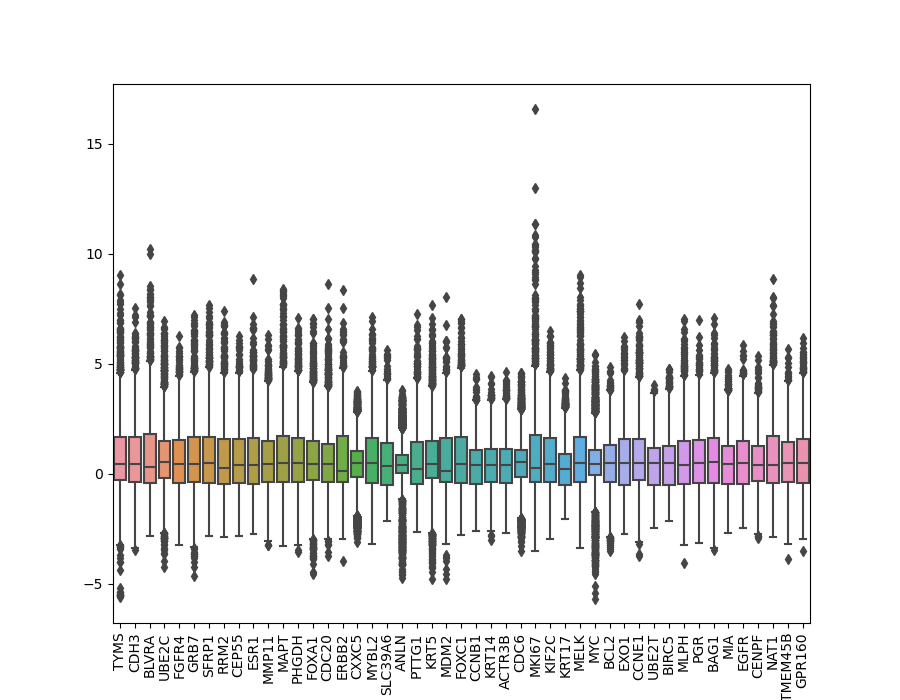

<AxesSubplot:>

In [60]:
print(provola.shape)
from matplotlib import pyplot
fig_dims = (9, 7)
fig, ax = pyplot.subplots(figsize=fig_dims)
ax.tick_params(axis='x', rotation=90)
sns.boxplot(data = provola)

Define model and selector

In [61]:
# Define possible models

# - tree-based models
model0 = preprocessing.StandardScaler() 
model0 |= tree.HoeffdingAdaptiveTreeClassifier(grace_period=100, split_confidence=1e-5,
                                               leaf_prediction='nb', nb_threshold=10, 
                                               seed=0)

model1 = preprocessing.StandardScaler() 
model1 |= tree.HoeffdingTreeClassifier(grace_period=100, split_confidence=1e-5, 
                                       leaf_prediction='nb', nb_threshold=10)

model2 = preprocessing.StandardScaler() 
model2 |= tree.ExtremelyFastDecisionTreeClassifier(grace_period=100, split_confidence=1e-5,
                                                   leaf_prediction='nb', nb_threshold=10,
                                                   min_samples_reevaluate=100)

# - ensemble-based models
model3 = preprocessing.StandardScaler() 
model3 |= ensemble.ADWINBaggingClassifier( 
            model=(preprocessing.StandardScaler() | 
                   tree.HoeffdingTreeClassifier(grace_period=50, split_confidence=1e-5,
                                                leaf_prediction='nb', nb_threshold=10)),
            n_models=10, seed=0)

model4 = preprocessing.StandardScaler() 
model4 |= ensemble.AdaptiveRandomForestClassifier(n_models=10, seed=0)

model5 = preprocessing.StandardScaler() 
model5 |= ensemble.AdaBoostClassifier(model=(tree.HoeffdingTreeClassifier(split_criterion='gini',
                                                                          split_confidence=1e-5,
                                                                          grace_period=2000)),
                                     n_models=5, seed=0)

# - lg-base models
model6 = preprocessing.StandardScaler() 
model6 |= multiclass.OneVsRestClassifier(linear_model.LogisticRegression(optimizer=optim.SGD(.1)))

# - KNN-based models
model7 = preprocessing.StandardScaler() 
model7 |= neighbors.KNNADWINClassifier(window_size=100)

model = model1

# Define the drif detector
adwin = ADWIN()

# Define the feature selectors

# - based on mutual information (univariate/filter method)
mi_selector = SelectKBest(mutual_info_classif, k = 100)

# - based on forward feature selection (wrapper method)

# - based the best important features according to embeeded methods
clf_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf_rf = RandomForestClassifier(random_state=0, n_estimators=10)
clf_gb = GradientBoostingClassifier(random_state=0)
sfm_selector = SelectFromModel(estimator=clf_lg) # max_features

# set the selector
selector = mi_selector

# Make a pipeline for feature selection
fs_proc = make_pipeline(StandardScaler(), selector)

Main script

In [62]:
random.seed(0)

# Define the metric to be evaluated
metric_ht = metrics.MacroF1() #BalancedAccuracy()
metric_ec = metrics.MacroF1() #BalancedAccuracy()

# set default biomarker
biomarker_opts = []

y_true = []
y_pred = []
ye_pred = []
all_ht = []
all_ec = []
drifts = []
feat_drifts = []

val_ec = 0
val_ht = 0

# Add the first model to the ensemble learning system
batch_models = []
feature_sets = []

C = 0
buffer = []
cnt_biomarker = None
for xi, yi in stream.iter_pandas(X_tot, Y_tot): #data
    
    buffer.append(C)
    
    # Select the features corresponding to the current biomarker
    xi = dict_filter(xi, biomarker_list)
  
    # Scale the features
    # xi_scaled = scaler.learn_one(xi).transform_one(xi)

    # Test the current model on the new "unobserved" sample
    yi_pred = model.predict_one(xi) 
    
    # Check if we have already included new classifiers
    if len(batch_models) == 0 :
        ye_pred.append(-1)
        all_ec.append(0)
    else :
        # Collect results from clf.predict calls
        
        if len(batch_models) > 1:
            preds = [clf.predict_proba(X_tot[fset].iloc[[C]]) for clf, fset in zip(batch_models[len(batch_models)-2:len(batch_models)],
                                                                                   feature_sets[len(feature_sets)-2:len(feature_sets)])]
        else:
            preds = [clf.predict_proba(X_tot[fset].iloc[[C]]) for clf, fset in zip(batch_models, feature_sets)]
        
        preds.append(dict2numpy(model.predict_proba_one(xi)))
        # Compile the average of the estimated class probabilities
        avgprob = np.average(np.asarray(preds), axis = 0)
        max_index_col = np.argmax(avgprob)
        pred = batch_models[0]['randomforestclassifier'].classes_[np.argmax(avgprob)]
        ye_pred.append(pred)
        # Update the metric
        val_ec = metric_ec.update(yi, pred)
        all_ec.append(val_ec.get())
    
    # Train the model with the new sample
    model.learn_one(xi, yi)

    # Store the truth and the prediction
    y_true.append(yi)
    y_pred.append(yi_pred)#y_pred.append(yi_pred[True])

    val_ht = metric_ht.update(yi, yi_pred)
    
    in_drift, in_warning = adwin.update(val_ht.get())
    if in_drift:
        print(f"Change detected at index {C}, input value: {val_ht.get()}")
        drifts.append(C)
        adwin.reset()   
        
    all_ht.append(val_ht.get())
    
    if C%50 == 0:
        print((val_ht,val_ec))
              
    if len(buffer) == 500:
        
        # define the training dataset
        fs_dat = X_tot.iloc[buffer,:]
        fs_y = Y_tot[buffer]
        
        print(collections.Counter(fs_y))
        
        # de-novo feature selection
        fs_proc.fit(fs_dat, fs_y)
        new_biomarker = fs_dat.columns[fs_proc['selectkbest'].get_support()]
        
        # check for feature drift detection
        if cnt_biomarker is None :
            setfeat = list(set.intersection(set(biomarker_list), set(new_biomarker)))
            test = len(setfeat) != len(biomarker_list)
        else :
            setfeat = list(set.intersection(set(cnt_biomarker), set(new_biomarker)))
            test = len(setfeat) != len(cnt_biomarker)
            
        if test == True :
            print(f"Feature drift detected at index {C}, intersection: {len(setfeat)}")
            print(set.intersection(set(biomarker_list), set(new_biomarker)))
            feat_drifts.append(C)
             
        # Define a new batch-based classifier
        cl_rf = RandomForestClassifier(n_estimators=500, oob_score = True,
                                       n_jobs=1, random_state=0,
                                       class_weight = "balanced")
        
        # Define the pipe
        clf_pipe = make_pipeline(StandardScaler(), cl_rf)
        
        # Define the evaluation process
        scoring = ['precision_macro', 'balanced_accuracy', 'f1_macro', 'f1_micro']
        cv_results = cross_validate(clf_pipe, fs_dat[new_biomarker], fs_y, cv=5, scoring=scoring) # scoring=scoring
        value_ba = np.mean(cv_results['test_balanced_accuracy'])
        value_f1mac = np.mean(cv_results['test_f1_macro'])
        value_f1mic = np.mean(cv_results['test_f1_micro'])
        print(f'For The New Feature Set* BA: {value_ba:.3f}')
        print(f'                         F1Ma: {value_f1mac:.3f}')
        print(f'                         F1Mi: {value_f1mic:.3f}')
        batch_models.append(clf_pipe)
        feature_sets.append(new_biomarker)
        
        # Train the new classifer
        clf_pipe.fit(fs_dat[new_biomarker], fs_y)
   
        # get importance
        importance = clf_pipe['randomforestclassifier'].feature_importances_
        sorted_indices = np.argsort(importance)[::-1]
        print(*fs_dat[new_biomarker].columns[sorted_indices[:10]], sep = "\n") # the top 10 ranked genes
        
        #cnt_biomarker = list(set.union(set(new_biomarker), set(cnt_biomarker)))
        cnt_biomarker = new_biomarker
        
        # reset the buffer
        buffer = []

    C = C + 1
    

(MacroF1: 0., 0)
(MacroF1: 0.173565, 0)
(MacroF1: 0.418576, 0)
(MacroF1: 0.460834, 0)
(MacroF1: 0.471307, 0)
Change detected at index 223, input value: 0.4858589512995147
(MacroF1: 0.488574, 0)
(MacroF1: 0.50734, 0)
(MacroF1: 0.528574, 0)
(MacroF1: 0.535133, 0)
(MacroF1: 0.532903, 0)
Counter({0: 288, 1: 100, 2: 53, 3: 43, 4: 16})
Feature drift detected at index 499, intersection: 20
{'UBE2C', 'SFRP1', 'RRM2', 'CEP55', 'ESR1', 'MAPT', 'CDC20', 'FOXA1', 'MYBL2', 'SLC39A6', 'ANLN', 'PTTG1', 'FOXC1', 'MKI67', 'KIF2C', 'MELK', 'CCNE1', 'BIRC5', 'MLPH', 'NAT1'}
For The New Feature Set* BA: 0.689
                         F1Ma: 0.703
                         F1Mi: 0.878
FOXA1
ESR1
SFRP1
MLPH
FOXC1
SOX10
SPDEF
CRYAB
GABRP
RGMA
(MacroF1: 0.548603, MacroF1: 1.)
(MacroF1: 0.558472, MacroF1: 0.796397)
(MacroF1: 0.581474, MacroF1: 0.85351)
(MacroF1: 0.596764, MacroF1: 0.846477)
(MacroF1: 0.612555, MacroF1: 0.843274)
(MacroF1: 0.610507, MacroF1: 0.828275)
Change detected at index 767, input value: 0.


(dot.exe:10956): Pango-WARNING **: couldn't load font "trebuchet Not-Rotated 11", falling back to "Sans Not-Rotated 11", expect ugly output.


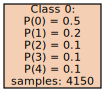

In [63]:
#model['HoeffdingAdaptiveTreeClassifier'].draw()
model['HoeffdingTreeClassifier'].draw()
#model['ExtremelyFastDecisionTreeClassifier'].draw()
#model['KNNADWINClassifier']
#model['ADWINBaggingClassifier']

In [64]:
all_feats = list(set().union(*[set(f.tolist()) for f in feature_sets]))
len(all_feats)

247

In [65]:
all_feats

['DNAJC12',
 'ABCC8',
 'CKAP2L',
 'CDC25A',
 'CDCA3',
 'KLK6',
 'SOX11',
 'C5orf30',
 'FOXA1',
 'NUDT12',
 'SKA3',
 'CLSPN',
 'CENPI',
 'FOXC1',
 'HAPLN3',
 'KRT14',
 'DEPDC1',
 'SKA1',
 'TPX2',
 'MKI67',
 'SERPINA11',
 'ARSG',
 'MPP6',
 'ASPM',
 'CMBL',
 'ANKRA2',
 'CDCA2',
 'LRRC48',
 'GATA3',
 'TCEAL1',
 'NDC80',
 'ZNF695',
 'MICALL1',
 'PLEKHG1',
 'APH1B',
 'RRM2',
 'CEP55',
 'MAPT',
 'YBX1',
 'DIAPH3',
 'ROPN1B',
 'KIF18A',
 'KRT16',
 'GABRP',
 'MCM10',
 'BUB1B',
 'ACADSB',
 'ANLN',
 'CENPN',
 'KRT5',
 'TROAP',
 'AURKA',
 'FAM72B',
 'EXO1',
 'KIF20A',
 'BCL11A',
 'UBE2T',
 'CENPO',
 'TTC8',
 'NEK2',
 'RUNDC1',
 'NUF2',
 'MLPH',
 'FANCA',
 'CDK1',
 'NCAPD2',
 'CDT1',
 'FAM174A',
 'C10orf32',
 'GINS1',
 'NCAPG',
 'CCDC125',
 'SPTBN4',
 'FAM47E',
 'TUBA1C',
 'SUV39H2',
 'TACC3',
 'CCNA2',
 'CLSTN2',
 'SLC39A6',
 'CRYAB',
 'TBC1D9',
 'CPLX1',
 'GPM6B',
 'BUB1',
 'CCNB2',
 'SPC25',
 'DLGAP5',
 'CPEB2',
 'ERBB4',
 'CDC45',
 'CDCA5',
 'STIL',
 'UGT8',
 'UBE2C',
 'SFRP1',
 'CT62',
 'REEP6

In [66]:
print(f'Balanced Accuracy*: {sk.metrics.balanced_accuracy_score(y_true[500:len(y_true)], y_pred[500:len(y_pred)]):.3f}')
print(f'Balanced Accuracy*: {sk.metrics.balanced_accuracy_score(y_true[500:len(y_true)], ye_pred[500:len(ye_pred)]):.3f}')

Balanced Accuracy*: 0.773
Balanced Accuracy*: 0.774


In [67]:
print(f'F1 score*: {sk.metrics.f1_score(y_true[500:len(y_true)], y_pred[500:len(y_pred)], average = "micro"):.3f}')
print(f'F1 score*: {sk.metrics.f1_score(y_true[500:len(y_true)], ye_pred[500:len(ye_pred)], average = "micro"):.3f}')

F1 score*: 0.743
F1 score*: 0.784


In [68]:
from sklearn import metrics

print(metrics.confusion_matrix(y_true[500:len(y_true)], y_pred[500:len(y_pred)]))
print("-----------------------------")
print(metrics.confusion_matrix(y_true[500:len(y_true)], ye_pred[500:len(ye_pred)]))

[[1168  414   15  101  114]
 [  33  698   19   54    0]
 [   2   33  257   43    1]
 [   0    4   14  443   11]
 [  23   10   15   31  147]]
-----------------------------
[[1340  329   13   94   36]
 [  47  691   14   52    0]
 [   2   40  254   39    1]
 [   0    4   14  446    8]
 [  43   11   13   30  129]]


In [69]:
drifts

[223, 767, 2527, 3583]

<IPython.core.display.Javascript object>


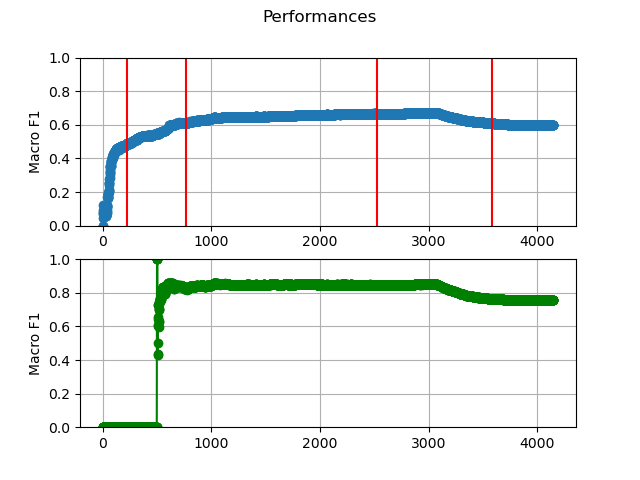

In [70]:
import numpy as np
import matplotlib.pyplot as plt

x1 = list(range(0, len(all_ht)))
x2 = list(range(0, len(all_ec)))

y1 = all_ht
y2 = all_ec

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Performances')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Macro F1')
ax1.set_ylim([0, 1])
ax1.grid()

for drift_detected in drifts:
    ax1.axvline(drift_detected, color='red')

ax2.plot(x2, y2, 'o-', color='green')
ax2.set_ylabel('Macro F1')
ax2.set_ylim([0, 1])
ax2.grid()

plt.show()

In [73]:
TIME_STR = 'time'
EVENT_STR = 'event'

In [74]:
import pandas as pd

def merge_x_y(x, y):
    if len(x) != len(y):
        raise ValueError("x and y have different lengths\n" + str(x) + "\n" + str(y))
    res = pd.concat([x.reset_index(drop=True), y.loc[:, [EVENT_STR, TIME_STR]].reset_index(drop=True)], axis=1)
    return res

In [75]:
from abc import abstractmethod, ABC
from lifelines import CoxPHFitter
from sksurv.linear_model import CoxPHSurvivalAnalysis

class CoxPredictor(ABC):

    @abstractmethod
    def score(self, x_test, y_test) -> float:
        raise NotImplementedError()

    @abstractmethod
    def p_vals(self):
        raise NotImplementedError()

    @abstractmethod
    def params(self):
        raise NotImplementedError()


class CoxModel(ABC):

    @abstractmethod
    def fit_estimator(self, x_train, y_train, alpha: float = 0) -> CoxPredictor:
        raise NotImplementedError()


class SKSurvCoxPredictor(CoxPredictor):

    __estimator: CoxPHSurvivalAnalysis

    def __init__(self, estimator: CoxPHSurvivalAnalysis):
        self.__estimator = estimator

    def score(self, x_test, y_test) -> float:
        return self.__estimator.score(x_test, y_test)

    def p_vals(self):
        raise NotImplementedError()

    def params(self):
        raise NotImplementedError()


class SKSurvCoxModel(CoxModel):

    def fit_estimator(self, x_train, y_train, alpha: float = 0) -> CoxPredictor:
        estimator = CoxPHSurvivalAnalysis(alpha=alpha).fit(x_train, y_train)
        return SKSurvCoxPredictor(estimator)


class LifelinesCoxPredictor(CoxPredictor):
    __estimator: CoxPHFitter

    def __init__(self, estimator: CoxPHFitter):
        self.__estimator = estimator

    @staticmethod
    def merge_x_y(x, y):
        return merge_x_y(x=x, y=y)

    def score(self, x_test, y_test) -> float:
        df = self.merge_x_y(x=x_test, y=y_test)
        return self.__estimator.score(df, scoring_method="concordance_index")

    def p_vals(self):
        summary = self.__estimator.summary
        return summary['p']

    def params(self):
        return self.__estimator.params_


class LifelinesCoxModel(CoxModel):

    def fit_estimator(self, x_train, y_train, alpha: float = 0) -> CoxPredictor:
        df = LifelinesCoxPredictor.merge_x_y(x=x_train, y=y_train)
        if df.isnull().values.any():
            print("Nulls detected in the dataframe")
            print(df.isnull())
        estimator = CoxPHFitter(penalizer=alpha, l1_ratio=0).fit(df=df, duration_col='time', event_col='event')
        return LifelinesCoxPredictor(estimator)

In [76]:
from statistics import mean
import sklearn


def create_folds(x, y, n_folds: int = 10, seed=4985):
    skf = sklearn.model_selection.StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
    res = []
    y_event = y[[EVENT_STR]]
    for train_index, test_index in skf.split(X=x, y=y_event):
        res.append([train_index, test_index])
    return res


def train_test_one_fold(x_train, y_train, x_test, y_test, model: CoxModel, alpha=0):
    predictor = model.fit_estimator(x_train=x_train, y_train=y_train, alpha=alpha)
    score = predictor.score(x_test=x_test, y_test=y_test)
    return score


def cross_validate(x, y, model: CoxModel, n_folds: int = 10, alpha=0, seed=78245):
    folds = create_folds(x, y, n_folds=n_folds, seed=seed)
    scores = []
    for train_index, test_index in folds:
        x_train = x.iloc[train_index]
        x_test = x.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
        fold_score = train_test_one_fold(x_train, y_train, x_test, y_test, model=model, alpha=alpha)
        scores.append(fold_score)
    return mean(scores)

In [77]:
def univariate_analysis(x, y, model: CoxModel = LifelinesCoxModel(), alpha=0.0):
    res = pd.DataFrame(columns=['feature', 'score', 'p_val', 'coefficient'])
    pos = 0
    for feat_name in x:
        feat_df = x[[feat_name]]
        feat_predictor = model.fit_estimator(x_train=feat_df, y_train=y, alpha=alpha)
        score = feat_predictor.score(x_test=feat_df, y_test=y)
        p_val = feat_predictor.p_vals()[0]
        coefficient = feat_predictor.params()[feat_name]
        res.loc[pos] = [feat_name, score, p_val, coefficient]
        pos += 1
    res.sort_values(by=['p_val'], inplace=True, ignore_index=True)
    return res


def univariate_analysis_with_covariates(x, y, cov, model: CoxModel = LifelinesCoxModel(), alpha=0.0):
    res = pd.DataFrame(columns=['feature', 'score', 'p_val', 'coefficient'])
    pos = 0
    for feat_name in x:
        feat_df = pd.concat(objs=[cov, x[[feat_name]]], axis=1)
        feat_predictor = model.fit_estimator(x_train=feat_df, y_train=y, alpha=alpha)
        score = feat_predictor.score(x_test=feat_df, y_test=y)
        p_val = feat_predictor.p_vals()[feat_name]
        coefficient = feat_predictor.params()[feat_name]
        res.loc[pos] = [feat_name, score, p_val, coefficient]
        pos += 1
    res.sort_values(by=['p_val'], inplace=True, ignore_index=True)
    return res

In [78]:
import statistics


def risk_score(coefs: dict, sample: dict) -> float:
    res = 0.0
    for key in coefs:
        if key in sample:
            res += coefs[key]*sample[key]  # TODO Can benefit from stable sum
    return res


def risk_scores(coefs: dict, x) -> [float]:
    x_dict = x.to_dict(orient='records')
    res = [risk_score(coefs=coefs, sample=i) for i in x_dict]
    return res


def prognostic_scores(x, y, model: CoxModel = LifelinesCoxModel(), alpha=0.0, p_val=0.05):
    """Scores of features with at least the passed p-val."""
    uni_res = univariate_analysis(x=x, y=y, model=model, alpha=alpha)
    uni_res_list = [(f, s, p) for f, s, p in zip(uni_res['feature'], uni_res['score'], uni_res['p_val'])]
    res = {}
    for r in uni_res_list:
        if r[2] < p_val:
            res[r[0]] = r[1]
    return res


def prognostic_coefficients(x, y, model: CoxModel = LifelinesCoxModel(), alpha=0.0, p_val=0.05):
    """Coefficients of features with at least the passed p-val."""
    uni_res = univariate_analysis(x=x, y=y, model=model, alpha=alpha)
    uni_res_list = [(f, c, p) for f, c, p in zip(uni_res['feature'], uni_res['coefficient'], uni_res['p_val'])]
    res = {}
    for r in uni_res_list:
        if r[2] < p_val:
            res[r[0]] = r[1]
    return res


class RSPrognosticClassifier:
    __coeffs: dict
    __cutoff: float

    def __init__(self, coeffs: dict, cutoff: float):
        self.__coeffs = coeffs
        self.__cutoff = cutoff

    def predict(self, x) -> [int]:
        scores = risk_scores(self.__coeffs, x=x)
        res = [s <= self.__cutoff for s in scores]
        return res


class RSPrognosticFitter:

    def fit(self, x_train, y_train, alpha=0.0, p_val=0.05) -> RSPrognosticClassifier:
        coeffs = prognostic_coefficients(x=x_train, y=y_train, alpha=alpha, p_val=p_val)
        scores = risk_scores(coeffs, x_train)
        cutoff = statistics.median(scores)
        return RSPrognosticClassifier(coeffs=coeffs, cutoff=cutoff)

In [79]:
class RiskScoreCoxPredictor(CoxPredictor):

    __rs_prognostic_classifier: RSPrognosticClassifier
    __lifelines_predictor: LifelinesCoxPredictor

    def __init__(self, rs_prognostic_classifier: RSPrognosticClassifier, lifelines_predictor: LifelinesCoxPredictor):
        self.__rs_prognostic_classifier = rs_prognostic_classifier
        self.__lifelines_predictor = lifelines_predictor

    def score(self, x_test, y_test) -> float:
        rs_classes = self.__rs_prognostic_classifier.predict(x=x_test)
        df_classes = pd.DataFrame()
        df_classes["risk_group"] = rs_classes
        return self.__lifelines_predictor.score(x_test=df_classes, y_test=y_test)

    def p_vals(self):
        return self.__lifelines_predictor.p_vals()

    def params(self):
        return self.__lifelines_predictor.params()


class RiskScoreCoxModel(CoxModel):
    __p_val: float

    def __init__(self, p_val=0.05):
        self.__p_val = p_val

    def fit_estimator(self, x_train, y_train, alpha: float = 0) -> CoxPredictor:
        coeffs = prognostic_coefficients(x=x_train, y=y_train, alpha=alpha, p_val=self.__p_val)
        scores = risk_scores(coeffs, x_train)
        cutoff = statistics.median(scores)
        rs_prognostic_classifier = RSPrognosticClassifier(coeffs=coeffs, cutoff=cutoff)
        rs_classes = rs_prognostic_classifier.predict(x=x_train)
        df_classes = pd.DataFrame()
        df_classes["risk_group"] = rs_classes
        lifelines_predictor = LifelinesCoxModel().fit_estimator(x_train=df_classes, y_train=y_train, alpha=alpha)
        return RiskScoreCoxPredictor(
            rs_prognostic_classifier=rs_prognostic_classifier, lifelines_predictor=lifelines_predictor)

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

MODEL = LifelinesCoxModel()
Y_AS_DF = True  # Otherwise it is a numpy array of tuples.

# The following list allows to run this part without rerunning the online learning.
saved_feats_from_online = [
             'DNAJC12', 'ABCC8', 'CKAP2L', 'CDC25A', 'CDCA3', 'KLK6', 'SOX11', 'C5orf30', 'FOXA1', 'NUDT12', 'SKA3',
             'CLSPN', 'CENPI', 'FOXC1', 'HAPLN3', 'KRT14', 'DEPDC1', 'SKA1', 'TPX2', 'MKI67', 'SERPINA11', 'ARSG',
             'MPP6', 'ASPM', 'CMBL', 'ANKRA2', 'CDCA2', 'LRRC48', 'GATA3', 'TCEAL1', 'NDC80', 'ZNF695', 'MICALL1',
             'PLEKHG1', 'APH1B', 'RRM2', 'CEP55', 'MAPT', 'YBX1', 'DIAPH3', 'ROPN1B', 'KIF18A', 'KRT16', 'GABRP',
             'MCM10', 'BUB1B', 'ACADSB', 'ANLN', 'CENPN', 'KRT5', 'TROAP', 'AURKA', 'FAM72B', 'EXO1', 'KIF20A',
             'BCL11A', 'UBE2T', 'CENPO', 'TTC8', 'NEK2', 'RUNDC1', 'NUF2', 'MLPH', 'FANCA', 'CDK1', 'NCAPD2', 'CDT1',
             'FAM174A', 'C10orf32', 'GINS1', 'NCAPG', 'CCDC125', 'SPTBN4', 'FAM47E', 'TUBA1C', 'SUV39H2', 'TACC3',
             'CCNA2', 'CLSTN2', 'SLC39A6', 'CRYAB', 'TBC1D9', 'CPLX1', 'GPM6B', 'BUB1', 'CCNB2', 'SPC25', 'DLGAP5',
             'CPEB2', 'ERBB4', 'CDC45', 'CDCA5', 'STIL', 'UGT8', 'UBE2C', 'SFRP1', 'CT62', 'REEP6', 'FAM171A1',
             'NUSAP1', 'ADCY9', 'HMMR', 'PTTG1', 'TTC36', 'LRRC56', 'ANXA9', 'SUSD3', 'KLK5', 'CA12', 'PLK1', 'ROPN1',
             'CCNE1', 'PRR15', 'E2F1', 'SPAG5', 'NCAPH', 'IL6ST', 'RHOB', 'XBP1', 'PARD6B', 'AGR3', 'SCUBE2', 'FSIP1',
             'LRRC46', 'PRR11', 'TRIM29', 'TTLL4', 'CCDC96', 'SGOL1', 'FERMT1', 'CDC20', 'ABAT', 'MYBL2', 'ANKRD42',
             'ERGIC1', 'FOXM1', 'KIF18B', 'TTK', 'MELK', 'LEPREL1', 'AGR2', 'POLQ', 'FAM64A', 'MAGED2', 'PDSS1',
             'LEMD1', 'BIRC5', 'PGAP3', 'GTSE1', 'UBXN10', 'FZD9', 'TLE3', 'CENPW', 'NAT1', 'AURKB', 'IFRD1', 'PTPRT',
             'CELSR1', 'C20orf26', 'WWP1', 'KIFC1', 'C6orf211', 'WDR19', 'ESPL1', 'UBE2S', 'PSAT1', 'CENPA', 'RARA',
             'BLM', 'KCMF1', 'CACNA1D', 'RAD51', 'SLC7A8', 'E2F2', 'KCNJ11', 'PGR', 'EZH2', 'RGMA', 'LRTOMT', 'TENC1',
             'SCN4B', 'CDKN3', 'DYNLRB2', 'LMX1B', 'PGK1', 'IRX1', 'FAM83D', 'CHEK1', 'MYB', 'ZNF703', 'ESR1',
             'C9orf116', 'DEPDC1B', 'ZNF552', 'STAC', 'B3GNT5', 'SPDEF', 'SPARCL1', 'DNAL1', 'DEGS2', 'CCNB1',
             'C7orf63', 'KDM4B', 'TCF19', 'KRT17', 'TRIP13', 'BCL2', 'PRC1', 'KIAA1467', 'RERG', 'KIF14', 'CDCA7',
             'MIA', 'SLC22A5', 'KRT6B', 'RAD54L', 'ZMYND10', 'SYTL4', 'GPR160', 'KIF11', 'BBS1', 'RGS22', 'ERBB2',
             'KIF4A', 'VGLL1', 'GSG2', 'AFF3', 'RABEP1', 'TFF1', 'KIF15', 'CDC6', 'SOX10', 'KIF2C', 'TCEAL4', 'MTHFD1L',
             'SHCBP1', 'MAD2L1', 'HJURP', 'IGF1R', 'THSD4', 'CKS1B', 'CDCA8', 'LONRF2', 'PPP1R14C', 'RAD51AP1',
             'SLC7A13', 'APOBEC3B']

USE_SAVED_FEATURES = True
if USE_SAVED_FEATURES:
    feats_from_online = saved_feats_from_online
else:
    feats_from_online = all_feats

print("Reading data from csv.")
data = pd.read_csv('sw_breast_gdat_2.csv')
data = data.drop('Unnamed: 0', axis=1, errors='ignore')

pheno = pd.read_csv('sw_breast_pheno.csv')
pheno = pheno.drop('Unnamed: 0', axis=1, errors='ignore')

pam50 = data['pam50']
data = data.drop('pam50', axis=1, errors='ignore')

all_feats = list(set(pam50sig + feats_from_online) & set(data.columns.values.tolist()))

print("all_feats: " + str(all_feats))

Reading data from csv.
all_feats: ['KIF15', 'FAM64A', 'SKA3', 'RGMA', 'TMEM45B', 'PLEKHG1', 'SUSD3', 'CDCA2', 'KDM4B', 'NEK2', 'EGFR', 'CDC6', 'ANLN', 'KIFC1', 'TTC8', 'KCMF1', 'UGT8', 'MAGED2', 'PRC1', 'RRM2', 'C10orf32', 'BCL2', 'ABCC8', 'BUB1', 'TRIM29', 'DLGAP5', 'ZNF703', 'LEPREL1', 'WDR19', 'CCNB1', 'CDCA3', 'LRRC56', 'KIF4A', 'IRX1', 'AFF3', 'RUNDC1', 'FOXC1', 'ANKRD42', 'GPM6B', 'LEMD1', 'HMMR', 'CCDC96', 'SPTBN4', 'DIAPH3', 'CPLX1', 'CT62', 'AURKA', 'TTK', 'C7orf63', 'PPP1R14C', 'BIRC5', 'RAD51', 'MTHFD1L', 'ROPN1', 'ARSG', 'CENPF', 'CCDC125', 'TTC36', 'ZNF695', 'PRR11', 'KIF18A', 'PHGDH', 'NUF2', 'STIL', 'SGOL1', 'CHEK1', 'DEGS2', 'XBP1', 'VGLL1', 'ANKRA2', 'CCNE1', 'DNAL1', 'SYTL4', 'LRTOMT', 'SLC22A5', 'MMP11', 'PRR15', 'RGS22', 'BAG1', 'AGR3', 'FAM47E', 'KRT6B', 'KRT14', 'TUBA1C', 'EXO1', 'TROAP', 'SPAG5', 'TLE3', 'RABEP1', 'PGR', 'FOXA1', 'TTLL4', 'TENC1', 'CRYAB', 'UBE2C', 'TFF1', 'KIAA1467', 'BCL11A', 'LRRC48', 'FAM174A', 'TBC1D9', 'CDCA8', 'C5orf30', 'MAD2L1', 'MELK', 

In [81]:
data = data[all_feats]

scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

print("shape before dropping na: " + str(data.shape))
data = data.dropna()
print("shape after dropping na: " + str(data.shape))

shape before dropping na: (3069, 262)
shape after dropping na: (3069, 262)


In [82]:
selected_data = data.loc[:, [c in feats_from_online for c in data.columns.values.tolist()]]
pam_50_data = data.loc[:, [c in pam50sig for c in data.columns.values.tolist()]]

if Y_AS_DF:
    y_cox = pheno[['OverallSurv', 'SurvDays']]
    y_cox.columns = [EVENT_STR, TIME_STR]
else:
    y_cox = []
    for index, row in pheno.iterrows():
        y_cox.append((row['OverallSurv'], row['SurvDays']))
    y_cox = np.array(y_cox, dtype=[(EVENT_STR, bool), (TIME_STR, int)])

uni_res = univariate_analysis(x=selected_data, y=y_cox, model=MODEL)
print("UNIVARIATE ANALYSIS")
print("Cox regressions with just one feature. The score is the c-statistic.")
print(uni_res.to_string())

UNIVARIATE ANALYSIS
Cox regressions with just one feature. The score is the c-statistic.
       feature     score         p_val  coefficient
0         PGK1  0.632386  2.904683e-15     0.350357
1        SYTL4  0.635622  1.553635e-14    -0.379171
2        IL6ST  0.617353  1.553655e-14    -0.405364
3         NAT1  0.627102  3.555190e-14    -0.425901
4        GATA3  0.595571  8.428823e-14    -0.336300
5         XBP1  0.606355  1.164072e-13    -0.357477
6         ABAT  0.612022  1.635631e-13    -0.396532
7       SCUBE2  0.617636  1.686910e-13    -0.389960
8        SUSD3  0.620461  2.181274e-13    -0.380141
9       UBXN10  0.611440  3.371634e-13    -0.362250
10        AFF3  0.618091  5.806367e-13    -0.354720
11        AGR3  0.593073  1.055471e-12    -0.337367
12      KCNJ11  0.612524  1.230356e-12    -0.338719
13        CT62  0.611661  1.643468e-12    -0.372469
14        FZD9  0.566711  1.833718e-12     0.289946
15     MTHFD1L  0.608003  3.862274e-12     0.355134
16       PTTG1  0.610653  4

In [83]:
print("HEAD OF PHENOTIPIC DATA")
pheno.head()

HEAD OF PHENOTIPIC DATA


,Sample_geo_accession,Sample_status,Sample_submission_date,Sample_last_update_date,Sample_type,Sample_channel_count,Sample_source_name_ch1,Sample_organism_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1.1,...,Sample_characteristics_ch1.8,Sample_characteristics_ch1.9,Sample_characteristics_ch1.10,Sample_characteristics_ch1.11,Sample_characteristics_ch1.12,Pam50,SurvDays,OverallSurv,Endocrine_treat,chemo
0,GSM2528079,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008818.C008840.S000215.l.r.m2.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G3,er prediction sgc: 0,pgr prediction sgc: 0,her2 prediction sgc: 0,ki67 prediction sgc: 1,Basal,2367,0,0.0,1.0
1,GSM2528080,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008769.C008792.S000250.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G2,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 0,ki67 prediction sgc: 0,LumA,2367,0,1.0,1.0
2,GSM2528081,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008568.C008577.S000424.l.r.m3.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G3,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 0,ki67 prediction sgc: 1,LumB,2168,1,1.0,1.0
3,GSM2528082,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008909.C009000.S000084.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G3,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 1,ki67 prediction sgc: 1,LumA,2416,0,1.0,1.0
4,GSM2528083,Public on Mar 12 2018,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,Q008781.C008782.S000260.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,...,nhg prediction mgc: G2,er prediction sgc: 1,pgr prediction sgc: 1,her2 prediction sgc: 0,ki67 prediction sgc: 0,Normal,2389,0,1.0,0.0


In [84]:
COVARIATES = ['Age']  # Append to this list to add more phenotipic covariates.
print("Covariates: " + str(COVARIATES))

Covariates: ['Age']


In [85]:
pheno_covariates = pheno[COVARIATES]
print("CHECK FOR NA IN COVARIATES")
pheno_covariates.isna().any()

CHECK FOR NA IN COVARIATES


Age    False
dtype: bool

In [86]:
uni_cov_res = univariate_analysis_with_covariates(x=selected_data, y=y_cox, cov=pheno_covariates, model=MODEL)
print("UNIVARIATE ANALYSIS WITH COVARIATES")
print("Cox regressions with just one feature and the covariates. The score is the c-statistic.")
print(uni_cov_res.to_string())

UNIVARIATE ANALYSIS WITH COVARIATES
Cox regressions with just one feature and the covariates. The score is the c-statistic.
       feature     score         p_val  coefficient
0         XBP1  0.758624  1.531673e-19    -0.413931
1         MLPH  0.751938  6.034526e-19    -0.372121
2         FZD9  0.749229  5.491467e-18     0.335641
3       ACADSB  0.761741  6.740582e-18    -0.449654
4        CENPW  0.752569  6.810580e-18     0.416390
5        SOX11  0.751667  1.407024e-17     0.403700
6       SCUBE2  0.753410  1.455021e-17    -0.447912
7         CT62  0.757622  1.616802e-17    -0.447452
8        FOXA1  0.749769  5.256799e-17    -0.345520
9     C10orf32  0.751584  5.382569e-17    -0.431349
10        BBS1  0.754024  6.924254e-17    -0.421383
11        ABAT  0.752045  1.255208e-16    -0.454131
12       CPEB2  0.752892  1.387138e-16    -0.444150
13       GATA3  0.753117  2.159474e-16    -0.353803
14      CCDC96  0.751585  2.469307e-16    -0.432074
15       THSD4  0.751954  3.423275e-16    -0

In [87]:
progn_scores = prognostic_scores(selected_data, y_cox)
print("Prognostic scores (c-statistics of features having p-val less than 0.05 in univariate cox regression)")
progn_scores

Prognostic scores (c-statistics of features having p-val less than 0.05 in univariate cox regression)


{'PGK1': 0.6323859800929413,
 'SYTL4': 0.6356223757633255,
 'IL6ST': 0.6173533880833918,
 'NAT1': 0.6271023214476534,
 'GATA3': 0.5955710834204277,
 'XBP1': 0.6063547251246472,
 'ABAT': 0.6120221641302847,
 'SCUBE2': 0.6176361736120703,
 'SUSD3': 0.62046142258062,
 'UBXN10': 0.611439652004389,
 'AFF3': 0.6180909761443691,
 'AGR3': 0.5930729273905803,
 'KCNJ11': 0.6125238803908435,
 'CT62': 0.6116605374749468,
 'FZD9': 0.5667113215857883,
 'MTHFD1L': 0.6080032214093405,
 'PTTG1': 0.6106525438969149,
 'CELSR1': 0.6203063466455381,
 'ACADSB': 0.6084241418045626,
 'CDC45': 0.6147014592775807,
 'CENPW': 0.6115843026665242,
 'EXO1': 0.6129096154898706,
 'MLPH': 0.5928279334763333,
 'KIF20A': 0.6019396220317293,
 'TBC1D9': 0.5918701115243573,
 'FAM64A': 0.6120338925623496,
 'TTC8': 0.6046710435437588,
 'WDR19': 0.6026889385247718,
 'SOX11': 0.5997340252239479,
 'CENPN': 0.6065814748112374,
 'TCF19': 0.6022022085940738,
 'CDT1': 0.6078924528842821,
 'ZNF703': 0.610551549065244,
 'KDM4B': 0.608

Histogram of c-statistics of prognostic features


(array([ 1.,  2.,  3.,  7., 13., 32., 44., 87., 36.,  5.]),
 array([0.47839492, 0.49411767, 0.50984042, 0.52556316, 0.54128591,
        0.55700865, 0.5727314 , 0.58845414, 0.60417689, 0.61989963,
        0.63562238]),
 <BarContainer object of 10 artists>)

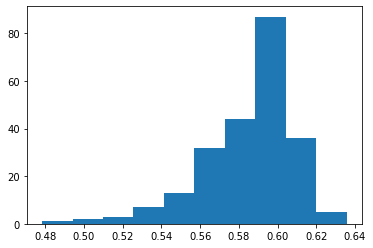

In [88]:
print("Histogram of c-statistics of prognostic features")
plt.hist(list(progn_scores.values()))

In [89]:
progn_coefficients = prognostic_coefficients(selected_data, y_cox)
print("Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)")
progn_coefficients

Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)


{'PGK1': 0.35035724045517114,
 'SYTL4': -0.37917063894779407,
 'IL6ST': -0.4053637378510091,
 'NAT1': -0.42590090877152115,
 'GATA3': -0.3363003502840347,
 'XBP1': -0.3574767931725952,
 'ABAT': -0.3965321605070494,
 'SCUBE2': -0.3899596169800453,
 'SUSD3': -0.3801408928794681,
 'UBXN10': -0.36224990661213224,
 'AFF3': -0.3547197659920028,
 'AGR3': -0.337367392443663,
 'KCNJ11': -0.3387189899727383,
 'CT62': -0.3724694073807415,
 'FZD9': 0.2899463312360576,
 'MTHFD1L': 0.3551342121065959,
 'PTTG1': 0.38362621309845313,
 'CELSR1': -0.3457694248201051,
 'ACADSB': -0.36289865444720865,
 'CDC45': 0.3741547776123304,
 'CENPW': 0.3142131864161671,
 'EXO1': 0.37059274446365437,
 'MLPH': -0.2887101211857118,
 'KIF20A': 0.37796441553442284,
 'TBC1D9': -0.33645678600126433,
 'FAM64A': 0.34545433602506453,
 'TTC8': -0.3300380147150425,
 'WDR19': -0.3448092636364817,
 'SOX11': 0.31053704911048,
 'CENPN': 0.33752472200104494,
 'TCF19': 0.3144241532069679,
 'CDT1': 0.35075769945496876,
 'ZNF703': -0.

Histogram of coefficients of prognostic features


(array([16., 49., 29., 10.,  0.,  0.,  3., 17., 50., 56.]),
 array([-0.42590091, -0.3449482 , -0.26399548, -0.18304277, -0.10209006,
        -0.02113735,  0.05981536,  0.14076808,  0.22172079,  0.3026735 ,
         0.38362621]),
 <BarContainer object of 10 artists>)

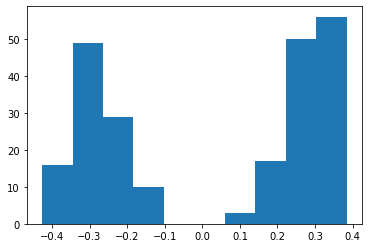

In [90]:
print("Histogram of coefficients of prognostic features")
plt.hist(list(progn_coefficients.values()))

In [92]:
rs_prognostic_fitter = RSPrognosticFitter()
rs_prognostic_classifier = rs_prognostic_fitter.fit(x_train=selected_data, y_train=y_cox)
rs_classes = rs_prognostic_classifier.predict(x=selected_data)
print("Classes from risk scores (True for lower risk)")
df_classes = pd.DataFrame()
df_classes["risk_group"] = rs_classes
print(df_classes)

Classes from risk scores
      risk_group
0          False
1           True
2          False
3          False
4           True
...          ...
3064       False
3065       False
3066        True
3067        True
3068       False

[3069 rows x 1 columns]


In [68]:
rs_res = univariate_analysis(x=df_classes, y=y_cox, model=MODEL)
print("Risk score results (results of univariate analysis on a predictive model using the classes from risk scores)")
print(rs_res.to_string())

Risk score results (results of univariate analysis on a predictive model using the classes from risk scores)
      feature     score         p_val  coefficient
0  risk_group  0.589034  1.290629e-09     -0.71634


In [95]:
print("Risk score model cross validation mean c-statistic")
print("In each fold the model is computed using the results of univariate models on all features... might take a while... (5/10 minutes?)")
rs_cv_score = cross_validate(x=selected_data, y=y_cox, model=RiskScoreCoxModel(), n_folds=10)
print(str(rs_cv_score))

Risk score model cross validation mean c-statistic
In each fold the model is computed using the results of univariate models on all features... might take a while...
0.5829786499883202


In [93]:
print("CROSS_VALIDATION OF COX MODELS WITH FEATURES FROM ON-LINE LEARNING VS PAM50 WITH DIFFERENT ALPHA VALUES")
print("The scores are cross-validated c-statistics.")
for a in [0, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]:
    print("alpha: " + str(a))
    selected_score = cross_validate(x=selected_data, y=y_cox, model=MODEL, n_folds=10, alpha=a)
    print("selected score: " + str(selected_score))
    pam50_score = cross_validate(x=pam_50_data, y=y_cox, model=MODEL, n_folds=10, alpha=a)
    print("pam50 score: " + str(pam50_score))

CROSS_VALIDATION OF COX MODELS WITH FEATURES FROM ON-LINE LEARNING VS PAM50 WITH DIFFERENT ALPHA VALUES
The scores are cross-validated c-statistics.
alpha: 0
selected score: 0.6499193742657352
pam50 score: 0.6805248688867708
alpha: 0.1
selected score: 0.6948597452221819
pam50 score: 0.6743149053004358
alpha: 0.3
selected score: 0.6847361427156273
pam50 score: 0.6640327740935331
alpha: 1
selected score: 0.6632778580266142
pam50 score: 0.6474517024082059
alpha: 3
selected score: 0.6430306276923284
pam50 score: 0.6379040992632836
alpha: 10
selected score: 0.6308373558829159
pam50 score: 0.6333900278603201
alpha: 30
selected score: 0.6263458463487418
pam50 score: 0.6317436824999102
alpha: 100
selected score: 0.6250158528376217
pam50 score: 0.6316130255666207
alpha: 300
selected score: 0.6244473852246022
pam50 score: 0.6313805637068375
alpha: 1000
selected score: 0.6242885638528858
pam50 score: 0.6313104749984252
alpha: 3000
selected score: 0.6241707760694847
pam50 score: 0.6312959840906193